
# Project: Investigate a Dataset - [TMDB]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<ul>
    <li><a href="#reading">Reading and Assessing Data</a></li>
    <li><a href="#inspect">Inspecting the data for the problems</a></li> 
    <li><a href="#clean">Data Cleaning</a></li>
    <li><a href="#manip">Data Manipulation</a></li> 

</ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

> This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.



In [1]:
# Importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

<a id='reading'></a>
#### 1- Reading and Assessing Data

In [2]:
#Reading CSV
df_orig = pd.read_csv('tmdb-movies.csv')

In [3]:
#information about datset
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# Making a copy of our dataset and set the indexing to the movie title
df=df_orig.copy()

In [5]:
#Take some samples of the datset to get familiar with them
df.sample(8)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6134,10372,tt0089110,0.393399,0,0,Ewoks: The Battle for Endor,Wilford Brimley|Warwick Davis|Aubree Miller|Si...,NaN,Jim Wheat|Ken Wheat,An adventure on a world beyond the stars.,...,"The army of the Marauders, led by by King Tera...",100,Fantasy|Science Fiction,Lucasfilm,11/24/85,32,5.3,1985,0.000000e+00,0.000000e+00
4846,135579,tt1989485,0.126328,0,0,Dead Before Dawn 3D,Christopher Lloyd|Devon Bostick|Martha MacIsaa...,NaN,April Mullen,Half Zombie. Half Demon. All Zemon!,...,A bunch of college kids accidentally unleash a...,88,Adventure|Comedy|Horror,KSM,10/10/12,16,3.9,2012,0.000000e+00,0.000000e+00
9480,8740,tt0096163,0.597387,0,0,Spoorloos,Bernard-Pierre Donnadieu|Eugene Bervoets|Johan...,NaN,George Sluizer,Who Has Seen This Woman?,...,A young man begins an obsessive search for his...,107,Horror|Thriller,MGS Film,10/27/88,40,7.1,1988,0.000000e+00,0.000000e+00
76,227973,tt2452042,2.140199,99000000,246233113,The Peanuts Movie,Noah Schnapp|Bill Melendez|Venus Schultheis|Ha...,http://www.peanutsmovie.com/,Steve Martino,The story of an underdog. And his dog.,...,Snoopy embarks upon his greatest mission as he...,88,Adventure|Animation|Comedy|Family,Blue Sky Studios|Twentieth Century Fox Animati...,11/5/15,414,6.4,2015,9.107996e+07,2.265344e+08
4427,76493,tt1645170,1.291798,65000000,179379533,The Dictator,Sacha Baron Cohen|Sayed Badreya|Aasif Mandvi|M...,http://www.dictatorthemovie.com/,Larry Charles,kurd,...,The heroic story of a dictator who risks his l...,83,Comedy,Paramount Pictures,5/15/12,1159,5.9,2012,6.173338e+07,1.703647e+08
5086,25935,tt0258816,0.431875,0,0,The Reckoning,Paul Bettany|Willem Dafoe|Tom Hardy|Brian Cox|...,NaN,Paul McGuigan,The truth shall come to light,...,"In 14th Century England, this tale of murder a...",112,Crime|Drama|Mystery,"Renaissance Films|Kanzaman, M.D.A. Films S.L.",8/6/03,10,7.2,2003,0.000000e+00,0.000000e+00
7116,11058,tt0335121,0.433748,25000000,30114487,Godsend,Greg Kinnear|Rebecca Romijn|Robert De Niro|Cam...,NaN,Nick Hamm,"When a miracle becomes a nightmare, evil is born.",...,A couple agree to have their deceased son clon...,102,Drama|Horror|Science Fiction|Thriller,Lions Gate Films|2929 Productions|Artists Prod...,4/30/04,60,4.7,2004,2.886113e+07,3.476553e+07
1970,23830,tt1294688,1.344701,7000000,7644937,Last Night,Keira Knightley|Sam Worthington|Eva Mendes|Gui...,http://www.lastnightmovie.com/,Massy Tadjedin,Temptation can lead anywhere.,...,"The story follows a married couple, apart for ...",90,Drama|Romance,Gaumont|Nick Wechsler Productions|Star Enterta...,5/11/10,150,6.1,2010,7.000000e+06,7.644937e+06


In [6]:
# df.columns

<a id='inspect'></a>
#### 2- Inspecting the data for the problems
- As the info() shows many columns will not be required for our analysis including [id, imdb_id, homepage, overview]
- Datetime conversion od release date.
- Checking the duplicates and delete them
- Many of the movies have been set to Zero budget and revenue, this is meanless so I'll drop these rows from the datset.
- Since our analysis will refer to director, genere and cast of each movie, I'll drop the NANs in all those three columns




<a id='clean'></a>
#### 3-Data Cleaning
 

###### Define
- As the info() shows many columns will not be required for our analysis including [id, imdb_id, homepage, overview]

##### Code

In [7]:
df.drop(columns= ['id', 'imdb_id', 'homepage', 'overview', 'tagline', 'keywords'], inplace = True)


##### test

In [8]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

##### Define
- Datetime conversion od release date.

In [9]:
# Code
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)

In [10]:
# Test
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

##### Define
- Checking the duplicates and delete them

In [11]:
df.duplicated().sum()

1

In [12]:
# Code
df.drop_duplicates(inplace=True)

In [13]:
# Test
df.duplicated().sum()

0

Define
- Many of the movies have been set to Zero budget and revenue, this is meanless so I'll drop these rows from the datset

In [14]:
len (df[df['budget']==0])

5696

In [15]:
len (df[df['revenue']==0])

6016

In [16]:
#Code
indexzero = df[ (df['revenue'] == 0) | (df['budget'] == 0) ].index
df.drop(indexzero , inplace=True)

In [17]:
#Test
len (df[df['budget']==0])

0

#### Define
- Dropping NANs of director and cast

In [18]:
df[['director','cast']].isna().sum()

director    1
cast        4
dtype: int64

In [19]:
# Code
df.dropna(subset=['director','cast'],inplace = True)

In [20]:
# Test
df[['director','cast']].isna().sum()

director    0
cast        0
dtype: int64

<a id='manip'></a>
#### 4-Data Manipulation

- Since many columns have pipeline delimiters between the recored, I'm goin to split those data with pipelines to number of rows as number of pipes into new dataframes to check the corelation between those data and both popularity and revenue

In [21]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [22]:
#df[df['production_companies'].str.contains('|')==True].sample()

In [23]:
def pipe (df, col_name):
    ''' Take two arguments of the dataframe and the required column of the dataframe and return a dataframe of the column with | seperator seperate in many rows'''
    pipe_df= df.copy()
    pipe_df[col_name] = pipe_df[col_name].str.replace(' ','')
    pipe_df[col_name] = pipe_df[col_name].str.split('[ |]')
    pipe_df.apply(lambda x: x.explode() if x.name in [col_name] else x)
    pipe_df= pipe_df.explode([col_name])
    pipe_df= pipe_df[['popularity', 'budget', 'revenue', col_name, 'vote_count', 'vote_average','release_date', 'release_year', 'budget_adj',
       'revenue_adj']]
    return pipe_df

In [24]:
#Creating four dataframes for cast, director, genres and production_companies
cast_df=pipe (df, 'cast')
production_co_df=pipe (df, 'production_companies')
director_df=pipe (df, 'director')
genres_df=pipe (df, 'genres')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Genres of movie with popularity and revenue)
- Find top five genres in term of popularity, votes average and revenue

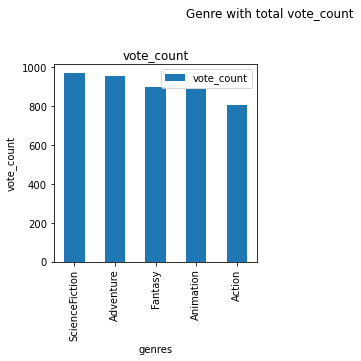

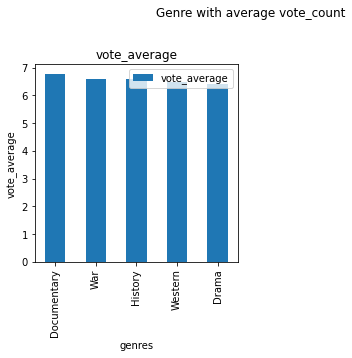

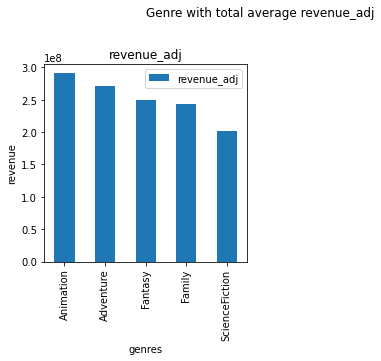

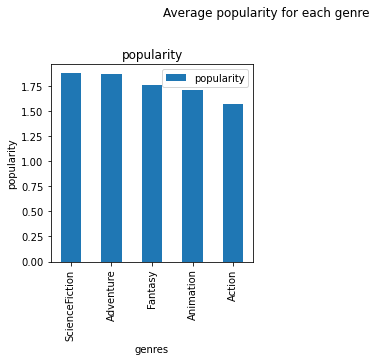

In [25]:
# 
genres_df_1 = genres_df[['genres', 'vote_count']].groupby(['genres']).mean().sort_values('vote_count', ascending = False).head()
genres_df_2 = genres_df[['genres', 'vote_average']].groupby(['genres']).mean().sort_values('vote_average', ascending = False).head()
genres_df_3 = genres_df[['genres', 'revenue_adj']].groupby(['genres']).mean().sort_values('revenue_adj', ascending = False).head()
genres_df_4 = genres_df[['genres', 'popularity']].groupby(['genres']).mean().sort_values('popularity', ascending = False).head()

genres_df_1.plot(kind='bar', title='Genre with total vote_count',
               ylabel='vote_count', xlabel='genres', figsize=(8, 8), subplots=True, layout = (2,2))
genres_df_2.plot(kind='bar', title='Genre with average vote_count',
               ylabel='vote_average', xlabel='genres', figsize=(8, 8), subplots=True, layout = (2,2))
genres_df_3.plot(kind='bar', title='Genre with total average revenue_adj',
               ylabel='revenue', xlabel='genres', figsize=(8, 8), subplots=True, layout = (2,2))
genres_df_4.plot(kind='bar', title='Average popularity for each genre',
               ylabel='popularity', xlabel='genres', figsize=(8, 8), subplots=True, layout = (2,2))
plt.show()



In [26]:
# Finding the most common genres in all years
genres_df.groupby(['release_year', 'genres']).size().sort_values(ascending=False).head(10)

release_year  genres
2011          Drama     89
2006          Drama     89
2010          Drama     84
2009          Drama     83
2005          Drama     82
2015          Drama     81
2008          Drama     80
2013          Drama     80
2014          Drama     79
2007          Drama     75
dtype: int64

In [27]:
# Finding the maximum number of movies directed by the same director in year
director_df.groupby(['release_year', 'director']).size().sort_values(ascending=False).head(10)

release_year  director        
2007          RobZombie           2
1994          GaryGoldman         2
2003          RobertRodriguez     2
2005          WesCraven           2
              UweBoll             2
2003          ShawnLevy           2
2005          TimBurton           2
2011          DennisDugan         2
2005          StevenSpielberg     2
2011          DavidGordonGreen    2
dtype: int64

In [28]:
# Finding the maximum number of movies of the same actor / actress in year
cast_df.groupby(['release_year', 'cast']).size().sort_values(ascending=False).head(10)

release_year  cast             
2012          BruceWillis          6
2013          JamesFranco          6
              DwayneJohnson        5
2006          HughJackman          5
2013          EdHarris             5
2009          JustinLong           5
2005          EwanMcGregor         5
2011          NicolasCage          5
2014          ScarlettJohansson    4
2011          OwenWilson           4
dtype: int64

In [29]:
# Top 10 Aggregated Revenue of the same director
director_df[['director', 'revenue_adj']].groupby(['director']).mean()['revenue_adj'].sort_values(ascending = False).head(10)

director
IrwinWinkler       1.583050e+09
HamiltonLuske      1.574815e+09
ClydeGeronimi      1.574815e+09
RichardMarquand    1.253819e+09
JenniferLee        1.192711e+09
GeorgeLucas        1.052320e+09
DavidYates         1.044364e+09
JamesCameron       9.159026e+08
LeeUnkrich         8.540177e+08
RamanHui           8.402392e+08
Name: revenue_adj, dtype: float64

In [30]:
# Top 10 yearly Revenue of the same director
director_df[[ 'director','revenue_adj']].groupby([ 'director','revenue_adj']).sum('revenue_adj').sort_values('revenue_adj', ascending=False).head(10)

,
director,revenue_adj
JamesCameron,2.827124e+09
GeorgeLucas,2.789712e+09
JamesCameron,2.506406e+09
WilliamFriedkin,2.167325e+09
StevenSpielberg,1.907006e+09
J.J.Abrams,1.902723e+09
StevenSpielberg,1.791694e+09
IrwinWinkler,1.583050e+09
ClydeGeronimi,1.574815e+09


In [31]:
df.drop(columns=['cast', 'director', 'genres', 'production_companies'], inplace= True)
df

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,131,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,3000000,13000000,Torn Curtain,128,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,4653000,6000000,El Dorado,120,2066-12-17,36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,12000000,20000000,The Sand Pebbles,182,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08


### Research Question 2  (Which is the most popular movie in the dataset)

In [32]:
#Finding corelation between various variables
df[['popularity', 'vote_count','vote_average','runtime', 'revenue_adj', 'budget_adj']].corr()

,popularity,vote_count,vote_average,runtime,revenue_adj,budget_adj
popularity,1.000000,0.779986,0.317750,0.215510,0.546716,0.398848
vote_count,0.779986,1.000000,0.387262,0.274215,0.654534,0.497657
vote_average,0.317750,0.387262,1.000000,0.352615,0.266806,0.036204
runtime,0.215510,0.274215,0.352615,1.000000,0.280978,0.334660
revenue_adj,0.546716,0.654534,0.266806,0.280978,1.000000,0.570187
budget_adj,0.398848,0.497657,0.036204,0.334660,0.570187,1.000000


- It's very obvious that the popularity is strongly positive corelated with the votes count and moderate positive corelated with the revenue.
- Moderate positive corelation between the budget and the revenue so it's more common that the high budget movie will be high revenue

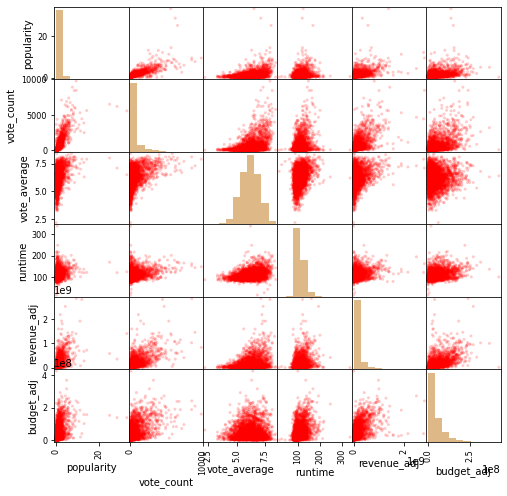

In [33]:
#Finding corelation between various variables in scatter plot
pd.plotting.scatter_matrix(df[['popularity', 'vote_count','vote_average','runtime', 'revenue_adj', 'budget_adj']],
                           figsize =(8,8), alpha=0.2, c='red', hist_kwds={'color':['burlywood']})
plt.show()

### Research Question 3 (Finding the highest movie in revenue and poularity)

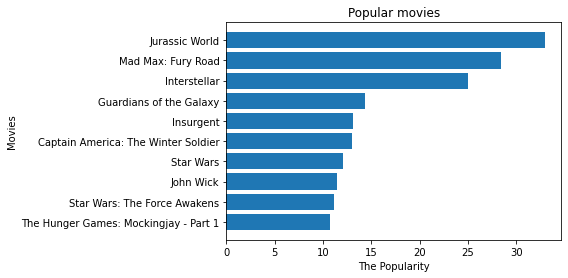

In [34]:
sorted_movies = df.sort_values(by='popularity', ascending=False)
title = sorted_movies.original_title[:10]

plt.plot(figsize=(20,10))
plt.gca().invert_yaxis()
plt.title('Popular movies')
plt.ylabel('Movies')
plt.xlabel("The Popularity")
plt.barh(title, sorted_movies['popularity'].head(10));

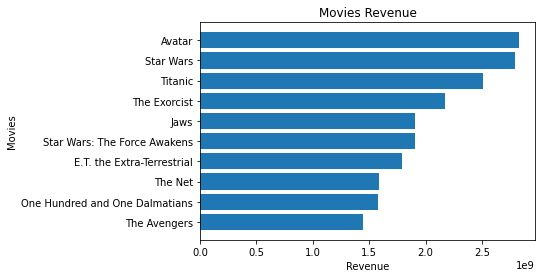

In [35]:
sorted_movies = df.sort_values(by='revenue_adj', ascending=False)
title = sorted_movies.original_title[:10]

plt.plot(figsize=(20,10))
plt.gca().invert_yaxis()
plt.title('Movies Revenue')
plt.ylabel('Movies')
plt.xlabel("Revenue")
plt.barh(title, sorted_movies['revenue_adj'].head(10));

<a id='conclusions'></a>
## Conclusion of finding

- No prefrence of the same genre of prospective of popularity, revenue and average rating.
- The most common genre in the whole dataset over years is drama and this is clear as every movie has a drama part in the IMDB description.
- No more than two movies directed by the same director in any year, however actors like Bruce Willis participate in six movies in the same year.
- The director who has the biggest revenue in one year is James Cameron in 2009 however Irwin Winkler has the biggest aggregated revenue
- It's very obvious that the popularity is strongly positive corelated with the votes count and moderate positive corelated with the revenue.
- Moderate positive corelation between the budget and the revenue so it's more common that the high budget movie will be high revenue
- Jurrasic World is the most popular movie in the dataset, however the highest revenue in the dataset is Avatar

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295